# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.


Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

#For scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import os
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

#To hide Warnings.
import warnings
warnings.filterwarnings('ignore')


In [2439]:
# loading the data and understanding the variables
linear_csv  = pd.read_csv('train.csv')
linear_csv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Data Inspection

In [2440]:
# Checking first 5 rows using head
linear_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2441]:
# shape of the train data
linear_csv.shape

(1460, 81)

In [2442]:
# describing the train data 
linear_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2443]:
#information of the data to know the type of column
linear_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2444]:
#checking the missing value of data
traindata_missing = (linear_csv.isnull().sum()/linear_csv.isnull().count()*100).sort_values()
traindata_missing

Id                0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
                   ...    
FireplaceQu      47.260274
Fence            80.753425
Alley            93.767123
MiscFeature      96.301370
PoolQC           99.520548
Length: 81, dtype: float64

In [2445]:
# Assign "NA" to garage related fields where there are no garage
linear_csv.loc[linear_csv["GarageCars"]==0,["GarageType","GarageFinish","GarageQual","GarageCond"]] = "NA"
linear_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2446]:
#impuating the column
linear_csv['LotFrontage'] = linear_csv.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
linear_csv["GarageYrBlt"].fillna(linear_csv["GarageYrBlt"].median(), inplace=True)
linear_csv["MasVnrArea"].fillna(linear_csv["MasVnrArea"].median(), inplace=True)
linear_csv["Electrical"].dropna(inplace=True)

In [2447]:
# Dropping the train data which is having alarge amount of missing values
linear_csv.drop(['PoolQC','Alley','MiscFeature','Fence'],axis=1,inplace=True)
linear_csv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


### Data Treatment

In [2448]:
linear_csv[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = linear_csv[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].replace("NA", "None")
linear_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [2449]:
## Convert three columns to 'object' type as mentioned above
linear_csv[['OverallQual', 'OverallCond']] = linear_csv[['OverallQual', 'OverallCond']].astype('object')

In [2450]:
## Convert two columns to 'numeric' type as mentioned above
linear_csv['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
linear_csv['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [2451]:
#Checking the datatypes of 
linear_csv[['OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [2452]:
#changine num to categorical variable as per the given data sheet
linear_csv['OverallQual']= linear_csv['OverallQual'].replace({10:'Very Excellent',
                                                             9:'Excellent',
                                                             8:'Very Good',
                                                             7:"Good",
                                                             6:"Above Average",
                                                             5:"Average",
                                                             4:"Below Average",
                                                             3:"Fair",
                                                             2:"Poor",
                                                             1:"Very Poor"}
                                                            )

linear_csv['OverallCond'] = linear_csv['OverallCond'].replace({10:'Very Excellent',
                                                             9:'Excellent',
                                                             8:'Very Good',
                                                             7:"Good",
                                                             6:"Above Average",
                                                             5:"Average",
                                                             4:"Below Average",
                                                             3:"Fair",
                                                             2:"Poor",
                                                             1:"Very Poor"})

In [2453]:
#converting the num into categorical variable as per the data sheet
linear_csv['MSSubClass'] = linear_csv['MSSubClass'].replace({20:"1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

In [2454]:
#Grouping the null values
linear_csv.isnull().sum()[linear_csv.isnull().sum()>0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
dtype: int64

In [2455]:
#calculate the age of house by using HouseAge from YrSold - YearBuilt 
linear_csv['HouseAge'] = linear_csv.YrSold - linear_csv.YearBuilt

#Droping YrSold and YearBuilt after converting to HouseAge
linear_csv=linear_csv.drop(columns=['YrSold', 'YearBuilt'])

In [2456]:
linear_csv.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
HouseAge         0
Length: 76, dtype: int64

In [2457]:
linear_csv['LotFrontage'].fillna(linear_csv['LotFrontage'].mean(), inplace=True)
linear_csv['MasVnrArea'].fillna(linear_csv['MasVnrArea'].mean(), inplace=True)

In [2458]:
linear_csv.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
SaleType         0
SaleCondition    0
SalePrice        0
HouseAge         0
Length: 76, dtype: int64

In [2459]:
#After changing the values 
linear_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,208500,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,181500,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,223500,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,140000,91
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,250000,8


In [2460]:
# checking the dependent variable i.e SalePrice

linear_csv['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

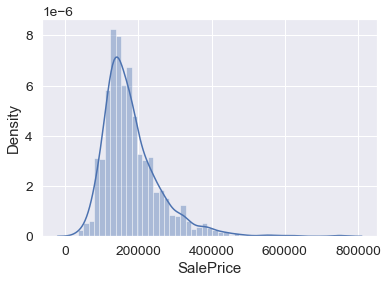

In [2461]:
#ploting the saleprice 
sns.distplot(linear_csv['SalePrice'])

In [2462]:
#Checking the skew of the saleprice variable
linear_csv['SalePrice'].skew()

1.8828757597682129

In [2463]:
#Converting and printing the saleprice 
print("Skewness: %f" % linear_csv['SalePrice'].skew())

Skewness: 1.882876


In [2464]:
# Applying log to the salePrice to the value
linear_csv['SalePrice']  = np.log(linear_csv.SalePrice)
linear_csv['SalePrice'].skew()

0.12133506220520406

### EDA

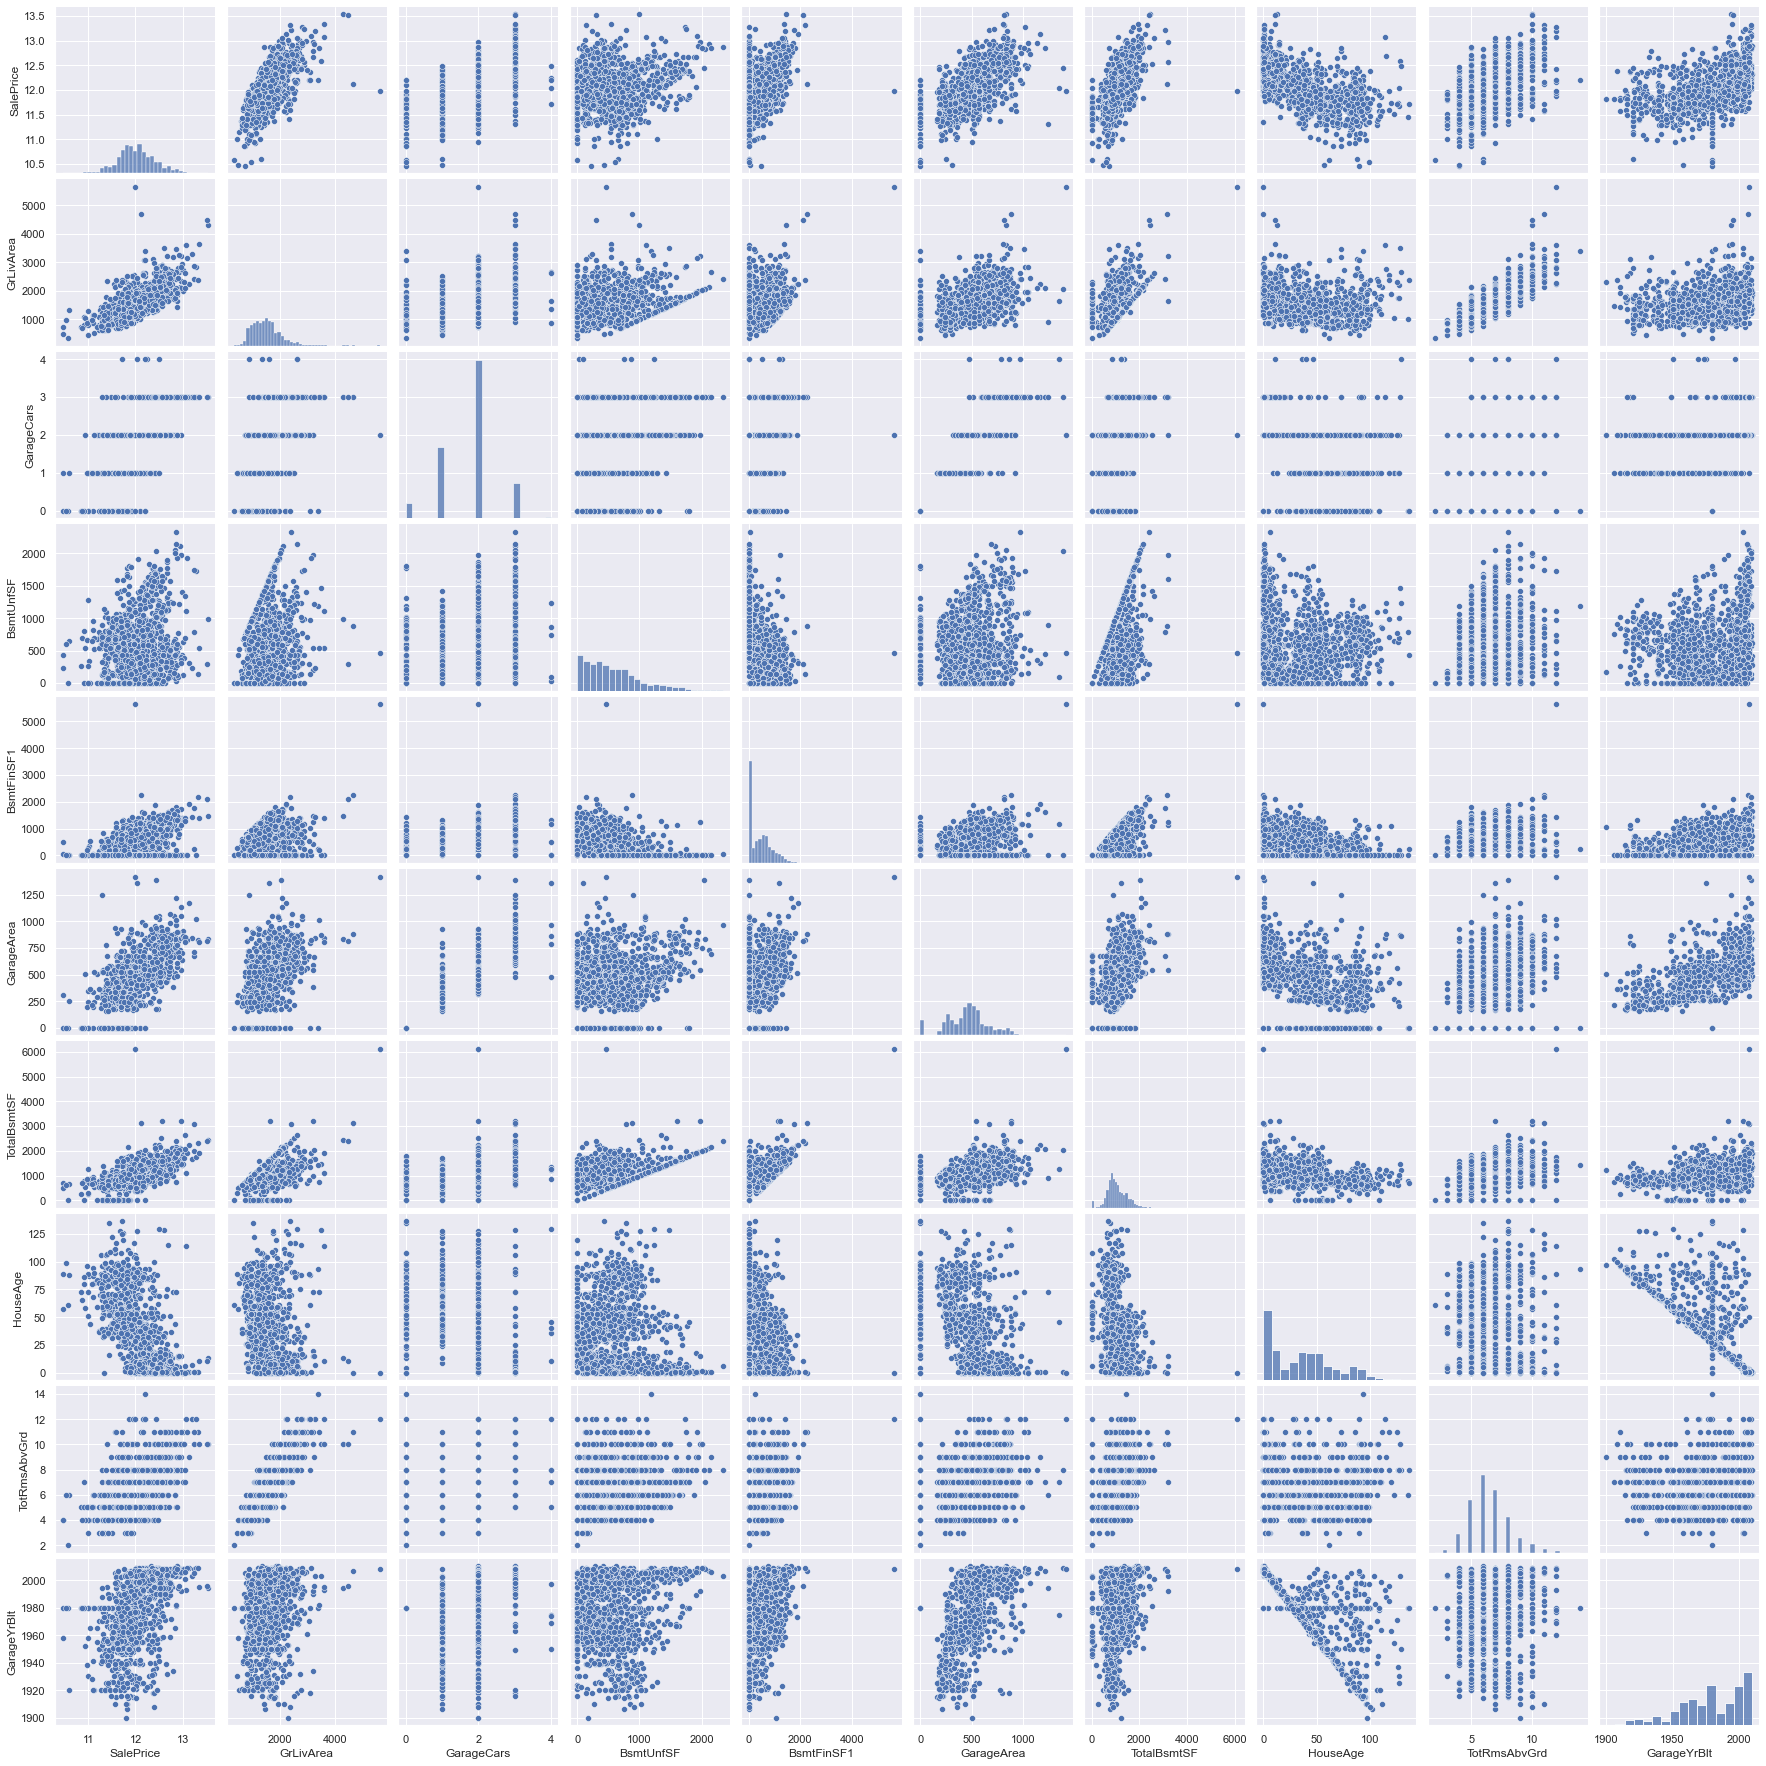

In [2465]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'HouseAge', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(linear_csv[cols], size = 2.5)
plt.show()

In [2466]:
#Checking unique values of the lotconfig
linear_csv['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

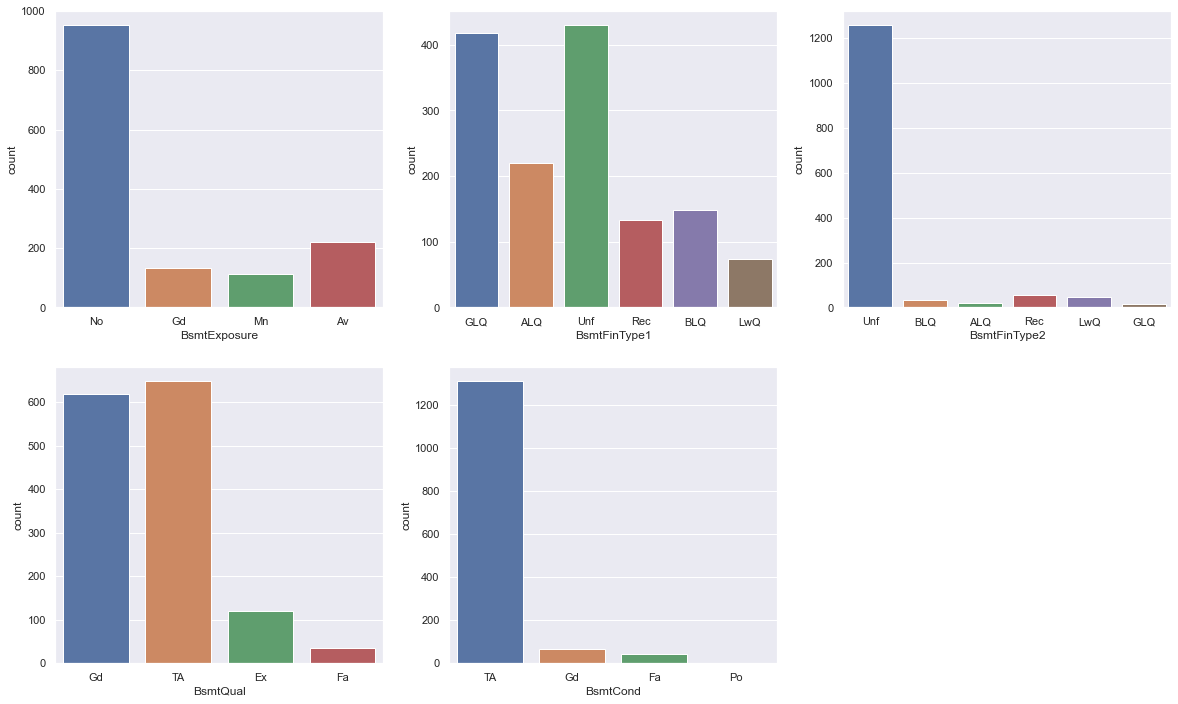

In [2467]:
#pLOtting the graph related to basement
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.countplot(x='BsmtExposure',data=linear_csv)
plt.subplot(2,3,2)
sns.countplot(x='BsmtFinType1',data=linear_csv)
plt.subplot(2,3,3)
sns.countplot(x='BsmtFinType2',data=linear_csv)
plt.subplot(2,3,4)
sns.countplot(x='BsmtQual',data=linear_csv)
plt.subplot(2,3,5)
sns.countplot(x='BsmtCond',data=linear_csv)

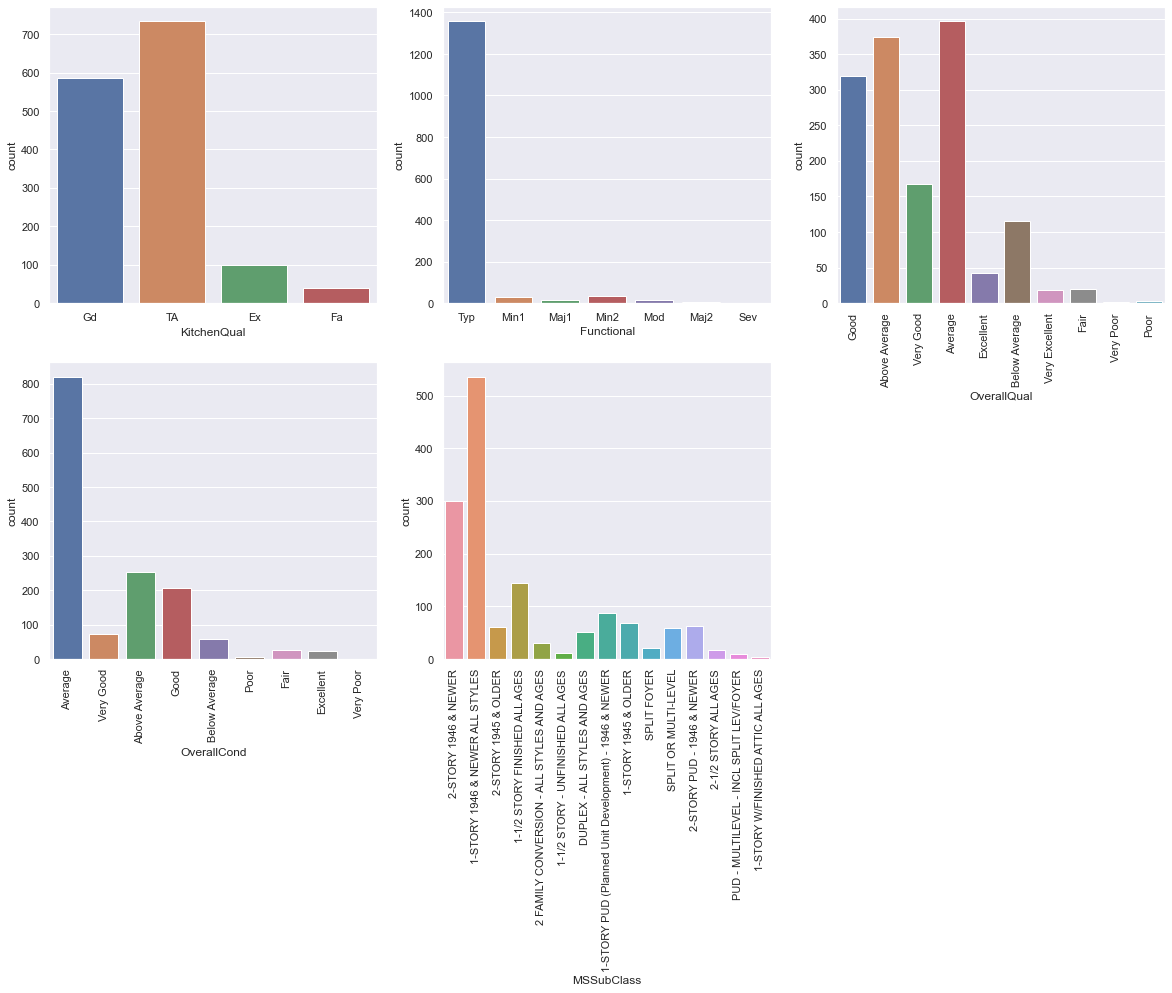

In [2468]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = linear_csv)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = linear_csv)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = linear_csv)
plt.xticks(rotation=90)


plt.show()


In [2469]:
#Checking the first five columns
linear_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,WD,Normal,12.247694,5
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,WD,Normal,12.109011,31
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,WD,Normal,12.317167,7
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,WD,Abnorml,11.849398,91
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,WD,Normal,12.429216,8


In [2470]:
#Knowing the each column datatype
linear_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

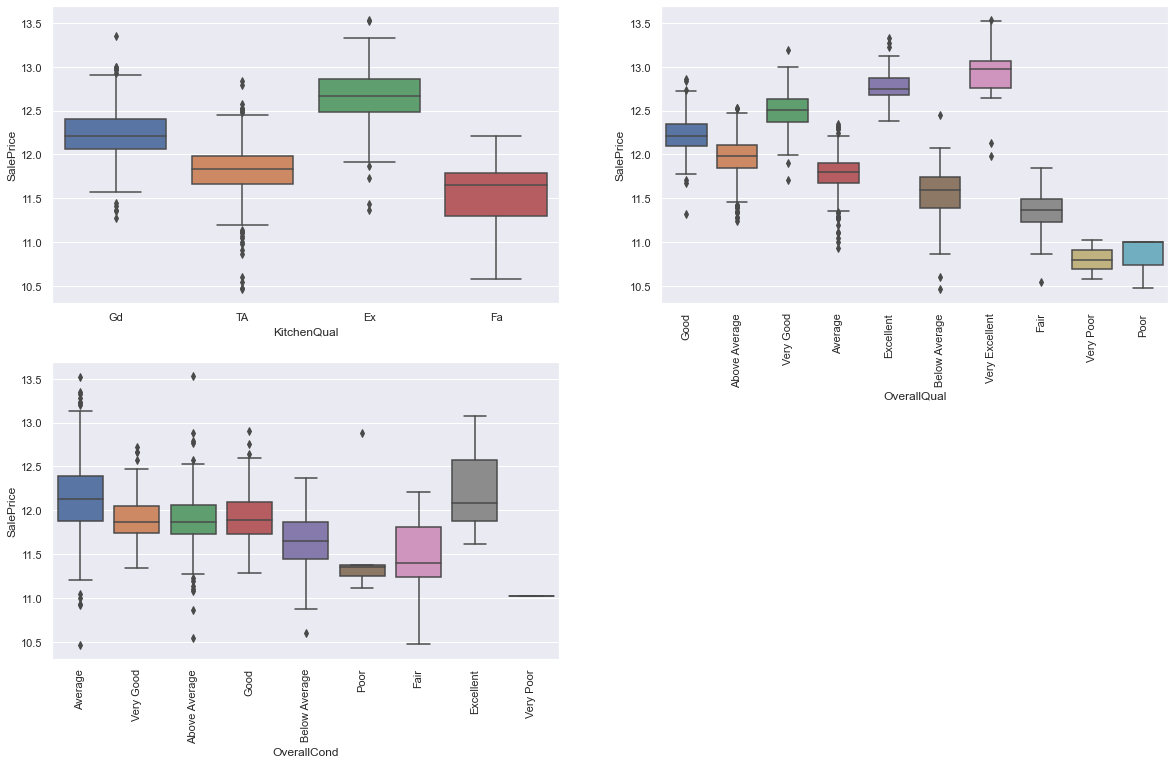

In [2471]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = linear_csv)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = linear_csv)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = linear_csv)
plt.xticks(rotation=90)


plt.show()

In [2472]:
linear_csv['SaleCondition'].value_counts() #similarly checking other columns for skewness


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

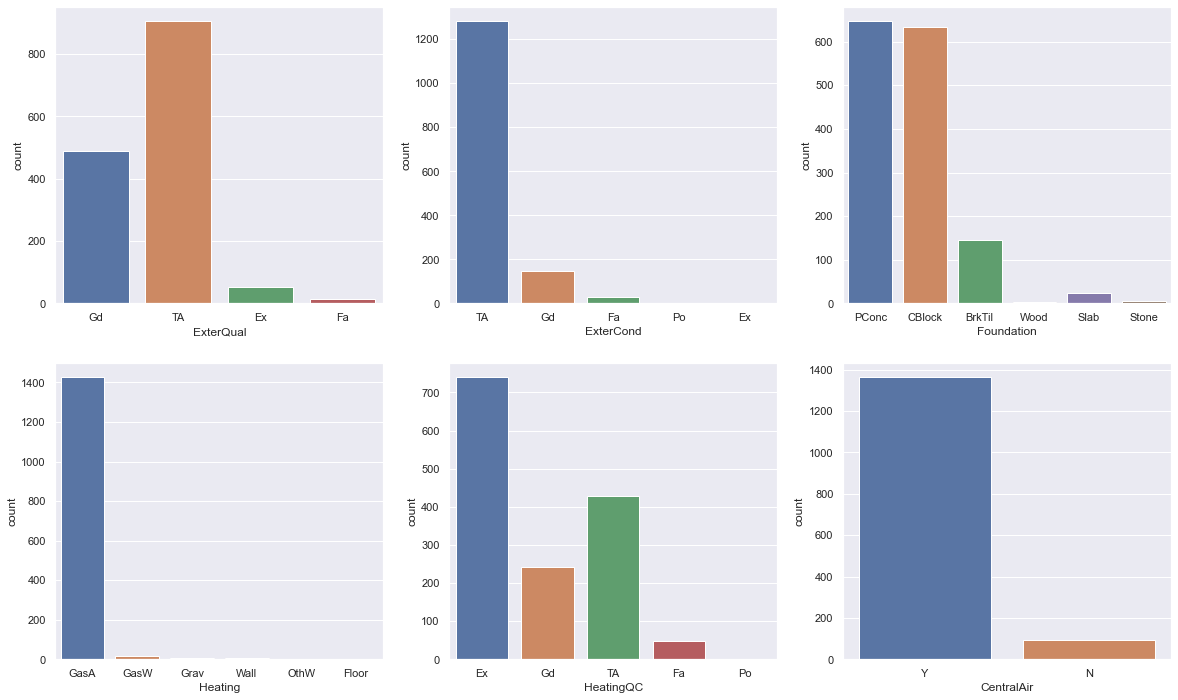

In [2473]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = linear_csv)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = linear_csv)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = linear_csv)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = linear_csv)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = linear_csv)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = linear_csv)
plt.show()

In [2474]:
linear_csv['HeatingQC'].value_counts() # similarly checked for all variables to check the skewness

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [2475]:
linear_csv['Foundation'] = linear_csv['Foundation'].replace(['Slab','Stone','Wood'],'Others')

# Dropping highly skewed column 
linear_csv.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [2476]:
linear_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

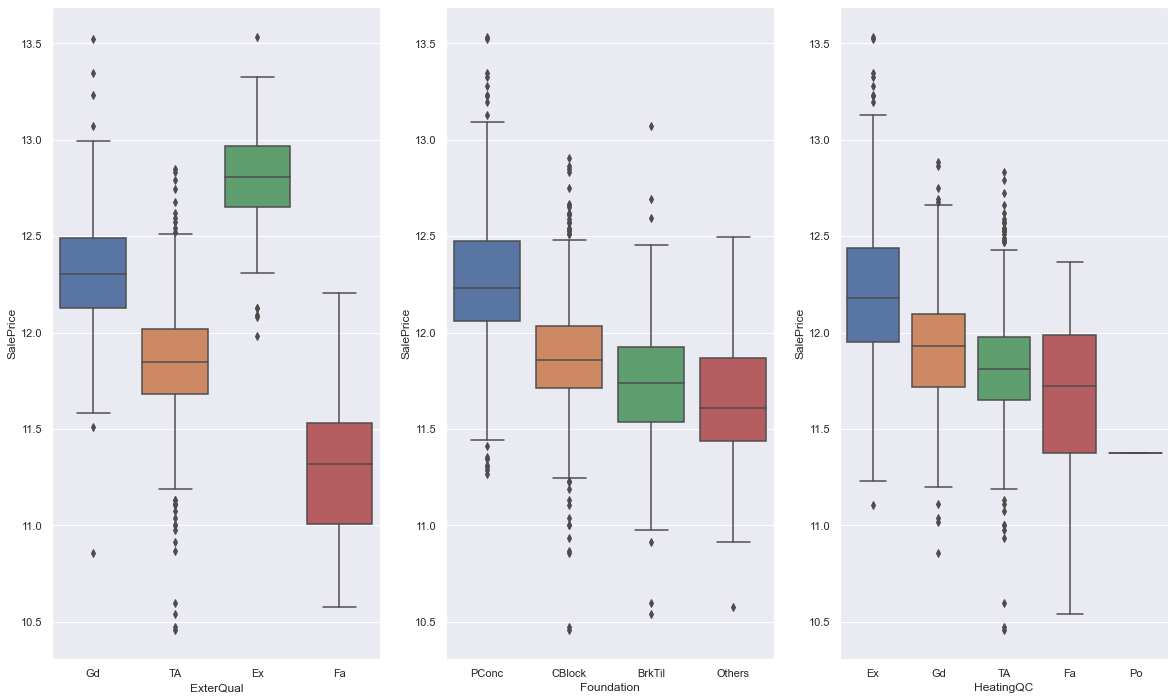

In [2477]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = linear_csv)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = linear_csv)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = linear_csv)

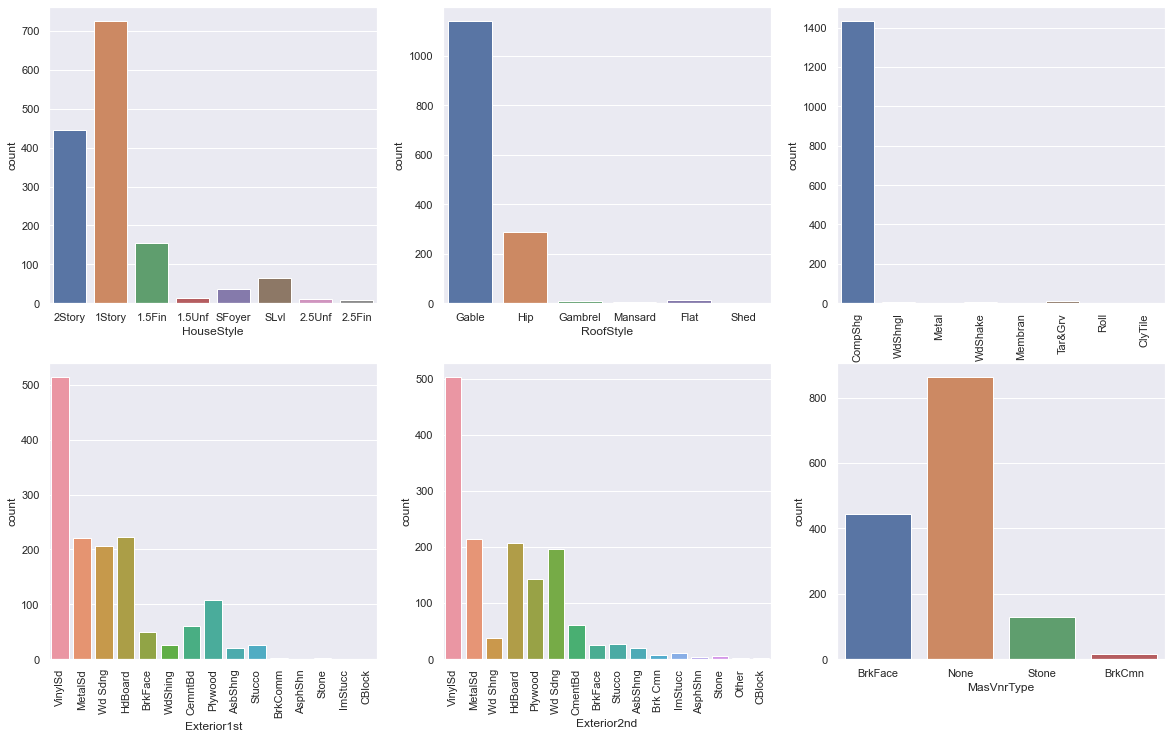

In [2478]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = linear_csv)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = linear_csv)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = linear_csv)
plt.show()


In [2479]:
linear_csv['Exterior2nd'].value_counts() #similarly checking the skewness for other columns


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [2480]:
linear_csv['HouseStyle'] = linear_csv['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
linear_csv['RoofStyle'] = linear_csv['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
linear_csv['Exterior1st'] = linear_csv['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
linear_csv['Exterior2nd'] = linear_csv['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

# Dropping highly skewed column 
linear_csv.drop(['RoofMatl'],axis=1,inplace=True)

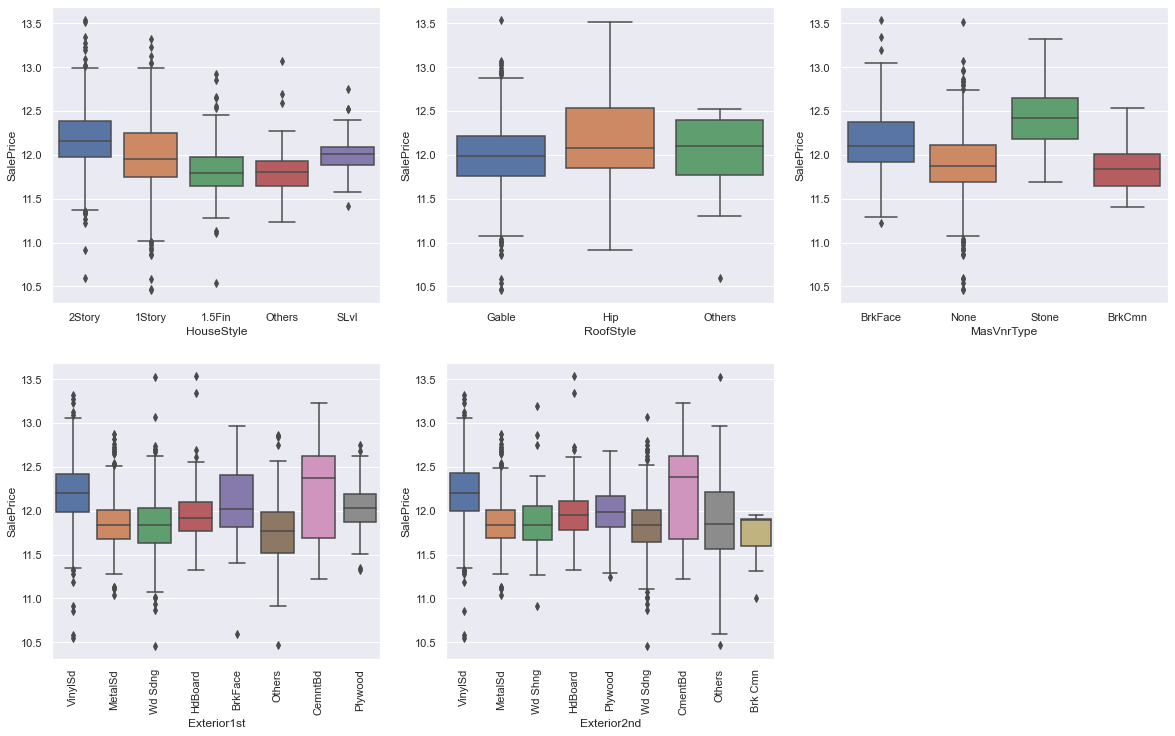

In [2481]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = linear_csv)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = linear_csv)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = linear_csv)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = linear_csv)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = linear_csv)
plt.xticks(rotation=90)
plt.show()

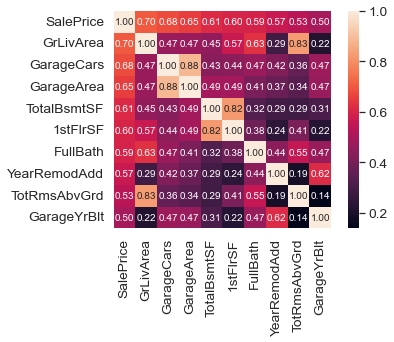

In [2482]:
#saleprice correlation matrix
corrmat = linear_csv.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(linear_csv[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [2483]:
lineardf_num = linear_csv.select_dtypes(include=['int64', 'float64'])
lineardf_obj = linear_csv.select_dtypes(include='object')
lineardf_obj.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [2484]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [2485]:
lineardf_obj_encoded = pd.get_dummies(lineardf_obj, drop_first=True)
lineardf_obj_encoded.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [2486]:
lineardf_obj_encoded.shape

(1460, 196)

In [2487]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([lineardf_num, lineardf_obj], axis=1)


## View the first few rows of our dataframe
df.head()


,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,65.0,8450,2003,196.0,706,0,150,856,856,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,80.0,9600,1976,0.0,978,0,284,1262,1262,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,68.0,11250,2002,162.0,486,0,434,920,920,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,60.0,9550,1970,0.0,216,0,540,756,961,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,84.0,14260,2000,350.0,655,0,490,1145,1145,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [2488]:
df = pd.concat([lineardf_num, lineardf_obj_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [2489]:
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [2490]:
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [2491]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [2492]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

In [2493]:
print(X_train.shape)
print(y_train.shape)

(1021, 228)
(1021,)


In [2494]:
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'HouseAge']

In [2495]:
## Creating a scaling instance
scaler = StandardScaler()

## Scaling the numerical related columns
scaler = StandardScaler()

X_train[[ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])

X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']] = scaler.fit_transform(X_test[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']])


In [2496]:
X_train.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,0.612765,0.166080,2001,-0.575015,0.085426,-0.283127,725,0.347365,2.572160,-0.797551,...,0,0,0,0,1,0,0,0,1,0
1408,-0.432534,-0.261043,1950,-0.575015,-0.943351,-0.283127,622,-0.973680,-1.069794,0.630928,...,0,0,0,0,1,0,0,0,1,0
1148,-0.432534,-0.439778,1950,-0.575015,-0.943351,-0.283127,572,-1.087563,-1.504156,0.440311,...,0,0,0,0,1,0,0,0,1,0
861,0.220778,0.079341,1965,-0.575015,0.870488,-0.283127,198,-0.023894,-0.303879,-0.797551,...,0,0,0,0,1,0,0,0,1,0
220,0.133670,-0.151525,2006,-0.575015,-0.943351,-0.283127,1498,1.021554,0.875837,-0.797551,...,0,0,1,0,0,0,0,0,0,1


In [2497]:
X_test.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
930,0.106932,-0.211538,2007,-0.560080,-1.009468,-0.301886,1450,0.899165,0.771223,-0.791130,...,0,0,0,0,1,0,0,0,1,0
530,0.676372,0.029981,1989,0.597117,0.743814,-0.301886,678,0.887692,0.884656,-0.791130,...,0,0,0,0,1,0,0,0,0,0
1291,-2.360638,-1.583933,1972,0.856033,-0.518001,-0.301886,399,-1.019124,-1.434127,0.740428,...,0,0,0,0,1,0,0,0,1,0
1385,-1.459026,-0.872447,2007,-0.560080,0.634091,-0.301886,61,-0.638220,-0.996222,0.024789,...,0,0,0,0,1,0,0,0,1,0
305,0.439105,0.065215,2005,0.739785,2.300508,-0.301886,536,2.124484,2.179903,-0.791130,...,0,0,0,0,1,0,0,0,1,0


In [2498]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2499]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, step=100)            
rfe = rfe.fit(X_train, y_train)

In [2500]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 3),
 ('LotArea', False, 3),
 ('YearRemodAdd', False, 3),
 ('MasVnrArea', False, 3),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', False, 3),
 ('2ndFlrSF', False, 2),
 ('LowQualFinSF', False, 3),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 3),
 ('BsmtHalfBath', False, 3),
 ('FullBath', False, 3),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', False, 3),
 ('TotRmsAbvGrd', False, 3),
 ('Fireplaces', False, 3),
 ('GarageYrBlt', False, 3),
 ('GarageCars', True, 1),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 3),
 ('EnclosedPorch', False, 3),
 ('3SsnPorch', False, 3),
 ('ScreenPorch', False, 3),
 ('PoolArea', False, 3),
 ('MiscVal', False, 3),
 ('MoSold', False, 3),
 ('HouseAge', False, 3),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 3),
 ('MSSubClass_1-STORY 1946 & NEWER AL

In [2501]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['GrLivArea', 'GarageCars', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT OR MULTI-LEVEL',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=114)

In [2502]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'GarageQual_Gd', 'GarageQual_None', 'GarageQual_Po', 'GarageCond_None',
       'GarageCond_Po', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_ConLI',
       'SaleType_WD', 'SaleCondition_AdjLand'],
      dtype='object', length=114)

In [2503]:
col = X_train.columns[rfe.support_]
col

Index(['GrLivArea', 'GarageCars', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT OR MULTI-LEVEL',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_Oth', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=114)

In [2504]:
X_train_rfe = X_train[col]

In [2505]:
X_train_rfe = pd.DataFrame(X_train[col])

In [2506]:
X_train_rfe.head()

,GrLivArea,GarageCars,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
175,1.229791,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1408,-0.279140,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1148,-0.757443,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
861,-0.894101,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
220,-0.022906,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [2507]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9352674561656247

In [2508]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8660720488236165

In [2509]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     82.03
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:49:31   Log-Likelihood:                 715.89
No. Observations:                1021   AIC:                            -1206.
Df Residuals:                     908   BIC:                            -648.9
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [2510]:
vif = pd.DataFrame()
vif['Features']  = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif  = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
207,GarageQual_TA,inf
211,GarageCond_Po,inf
104,BldgType_Duplex,inf
199,GarageType_None,inf
200,GarageFinish_None,inf
...,...,...
26,3SsnPorch,1.21
60,LotConfig_FR3,1.14
94,Condition1_RRNe,NaN
179,Electrical_Mix,NaN


In [2511]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train)

In [2512]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()


In [2513]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     53.46
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:49:45   Log-Likelihood:                 883.77
No. Observations:                1021   AIC:                            -1332.
Df Residuals:                     803   BIC:                            -257.1
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                                6.1012      0.556     10.969      0.000       5.009       7.193
LotFrontage                                                         -0.0139      0.006     -2.211      0.027      -0.026      -0.002
LotArea                                                              0.0263      0.007      3.651      0.000       0.012       0.040
YearRemodAdd                                                         0.0011      0.000      3.260      0.001       0.000       0.002
MasVnrArea                                                           0.0066      0.007      0.983      0.326      -0.007       0.020
BsmtFinSF1                                                           3.6896      0.336     10.969      0.000       3.029       4.350
BsmtFinSF2                                                           1.2991      0.117     11.073      0.000       1.069       1.529
BsmtUnfSF                                                            0.0080      0.001     11.021      0.000       0.007       0.009
TotalBsmtSF                                                         -3.4988      0.320    -10.949      0.000      -4.126      -2.872
1stFlrSF                                                             0.0329      0.010      3.452      0.001       0.014       0.052
2ndFlrSF                                                             0.0499      0.010      4.835      0.000       0.030       0.070
LowQualFinSF                                                         0.0002      0.005      0.050      0.960      -0.009       0.009
GrLivArea                                                            0.0656      0.008      8.680      0.000       0.051       0.080
BsmtFullBath                                                         0.0281      0.006      4.382      0.000       0.016       0.041
BsmtHalfBath                                                         0.0048      0.004      1.095      0.274      -0.004       0.014
FullBath                                                             0.0265      0.008      3.482      0.001       0.012       0.041
HalfBath                                                             0.0159      0.007      2.380      0.018       0.003       0.029
BedroomAbvGr                                                        -0.0003      0.007     -0.046      0.963      -0.014       0.014
KitchenAbvGr                                                        -0.0242      0.008     -3.097      0.002      -0.040      -0.009
TotRmsAbvGrd                                                         0.0103      0.006      1.726      0.085      -0.001       0.022
Fireplaces              

### Ridge Regression

In [2514]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [2515]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2516]:
print(ridgeCV.best_params_)

{'alpha': 10.0}


In [2517]:
ridgeCV.cv_results_

{'mean_fit_time': array([0.02840872, 0.04781108, 0.02520781, 0.01700644, 0.01780281,
        0.02260575, 0.01660442, 0.01780248, 0.01780357, 0.01700568,
        0.0176054 , 0.01740446, 0.01980367, 0.02180486, 0.01820326,
        0.0200048 , 0.01720405, 0.01720481, 0.01960554, 0.02180548,
        0.01960273, 0.01880727, 0.01940131, 0.01860547, 0.0182055 ,
        0.02740784, 0.01900301, 0.01599884]),
 'std_fit_time': array([0.00265278, 0.01214206, 0.01219302, 0.00063302, 0.0014719 ,
        0.01122062, 0.00224577, 0.00264036, 0.00299592, 0.00063407,
        0.00205865, 0.00185464, 0.0061448 , 0.00676653, 0.00039828,
        0.00179062, 0.00116577, 0.00074838, 0.00224399, 0.00744059,
        0.00272934, 0.00222832, 0.00102007, 0.00326063, 0.00248111,
        0.01548879, 0.00109484, 0.00063128]),
 'mean_score_time': array([0.00500078, 0.00500031, 0.0045989 , 0.00599875, 0.00560198,
        0.00700064, 0.00520205, 0.0048017 , 0.00580277, 0.00520129,
        0.00559974, 0.00520101, 0.005203

In [2518]:
ridge = Ridge(alpha=10)

In [2519]:
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [2520]:
ridge.coef_

array([-9.04695895e-03,  1.92068062e-02,  1.74157799e-03,  6.61215134e-03,
        3.03625612e-03,  1.44079393e-02,  1.91074805e-05,  8.49452311e-03,
        3.58141771e-02,  4.81793358e-02, -8.45668583e-04,  6.61925177e-02,
        2.33991933e-02,  3.51068767e-03,  3.50431018e-02,  1.97916862e-02,
        4.12845969e-03, -2.31563367e-02,  1.18960639e-02,  1.60429236e-02,
       -6.46409473e-04,  6.81888505e-02,  3.55683864e-03,  9.66179231e-03,
        6.92191445e-03,  1.37522845e-02,  5.97958631e-03,  1.39265994e-02,
       -1.48797317e-02, -2.60869819e-06,  2.63795371e-04, -1.90634969e-03,
        2.49475794e-02, -2.87202024e-03,  2.19702201e-02, -2.15994926e-03,
       -1.45509502e-02,  7.29739168e-04,  3.98059197e-03,  4.05015520e-02,
       -2.09383057e-02, -6.16799202e-02,  2.03773928e-02, -2.47840372e-02,
        4.93071310e-03,  2.47947346e-03,  5.44704431e-02,  4.37815094e-02,
        4.98311826e-02, -2.03288966e-03,  1.77699260e-02,  1.36827724e-02,
       -4.84331135e-02,  

In [2521]:
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [2522]:
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.88
RSS (Train) = 13.32
RSS (Test) = 8.60
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.11
RMSE (Test) = 0.14


In [2523]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028409,0.002653,0.005001,0.000633,0.0001,{'alpha': 0.0001},-0.105615,-0.086354,-0.109692,-0.110281,...,-0.105462,0.010043,26,-0.067460,-0.072418,-0.067831,-0.057917,-0.067083,-0.066542,0.004727
1,0.047811,0.012142,0.005000,0.000896,0.001,{'alpha': 0.001},-0.105571,-0.086334,-0.109672,-0.110248,...,-0.105417,0.010025,25,-0.067470,-0.072424,-0.067829,-0.057919,-0.067086,-0.066546,0.004728
2,0.025208,0.012193,0.004599,0.000489,0.01,{'alpha': 0.01},-0.105166,-0.086133,-0.109501,-0.109951,...,-0.105001,0.009863,24,-0.067556,-0.072481,-0.067819,-0.057939,-0.067127,-0.066584,0.004738
3,0.017006,0.000633,0.005999,0.001674,0.05,{'alpha': 0.05},-0.104049,-0.085249,-0.109090,-0.109065,...,-0.103685,0.009500,23,-0.067842,-0.072723,-0.067845,-0.057996,-0.067310,-0.066743,0.004796
4,0.017803,0.001472,0.005602,0.000490,0.1,{'alpha': 0.1},-0.103217,-0.084793,-0.108894,-0.108393,...,-0.102719,0.009198,22,-0.068095,-0.072993,-0.067896,-0.058065,-0.067535,-0.066917,0.004858
5,0.022606,0.011221,0.007001,0.003521,0.2,{'alpha': 0.2},-0.102101,-0.084335,-0.108551,-0.107534,...,-0.101496,0.008867,21,-0.068485,-0.073461,-0.068106,-0.058267,-0.067867,-0.067237,0.004938
6,0.016604,0.002246,0.005202,0.000401,0.3,{'alpha': 0.3},-0.101288,-0.084074,-0.108140,-0.106945,...,-0.100743,0.008691,20,-0.068835,-0.073865,-0.068297,-0.058510,-0.068127,-0.067527,0.004983
7,0.017802,0.002640,0.004802,0.000401,0.4,{'alpha': 0.4},-0.100646,-0.083944,-0.107767,-0.106526,...,-0.100162,0.008541,19,-0.069138,-0.074175,-0.068504,-0.058754,-0.068329,-0.067780,0.005001
8,0.017804,0.002996,0.005803,0.001327,0.5,{'alpha': 0.5},-0.100109,-0.083830,-0.107393,-0.106165,...,-0.099660,0.008417,17,-0.069407,-0.074426,-0.068682,-0.058980,-0.068504,-0.068000,0.005007
9,0.017006,0.000634,0.005201,0.000980,0.6,{'alpha': 0.6},-0.099676,-0.083706,-0.106976,-0.105843,...,-0.099211,0.008311,16,-0.069651,-0.074646,-0.068833,-0.059199,-0.068665,-0.068199,0.005006


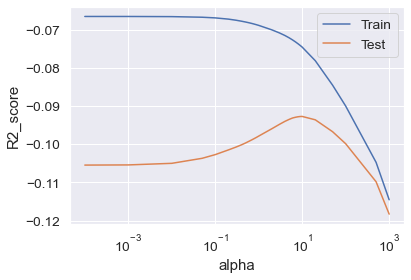

In [2524]:
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

### LASSO Regression

In [2525]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2526]:
GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2527]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [2528]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.53611169, 0.21912265, 0.03761172, 0.04602847, 0.02931266,
        0.02480817, 0.02600155, 0.02811174, 0.02682796, 0.02762928,
        0.02543054, 0.02581091, 0.02600942, 0.02760901, 0.02660537,
        0.02800727, 0.0240036 , 0.02560515, 0.02860541, 0.02880621,
        0.0258028 , 0.02700257, 0.02800865, 0.02520518, 0.03080716,
        0.02620287, 0.03140297, 0.02619877]),
 'std_fit_time': array([0.08625562, 0.06703644, 0.01093428, 0.01187975, 0.0014608 ,
        0.00231549, 0.00502124, 0.00475175, 0.0030362 , 0.00372614,
        0.00341466, 0.00271463, 0.00603505, 0.00488411, 0.00307221,
        0.00282576, 0.00167562, 0.00279986, 0.00771075, 0.00570728,
        0.00466576, 0.00629127, 0.00469255, 0.00354925, 0.01512222,
        0.00479374, 0.01488327, 0.00844933]),
 'mean_score_time': array([0.00791135, 0.01092801, 0.01460233, 0.01001716, 0.0094008 ,
        0.00780091, 0.00800524, 0.00820279, 0.00810981, 0.00810766,
        0.00939765, 0.00899954, 0.009797

In [2529]:
lasso = Lasso(alpha=0.001)

In [2530]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [2531]:
## View the coefficients of lasso fitted model
lasso.coef_

array([-4.85076861e-03,  1.39848636e-02,  1.97224518e-03,  2.82400698e-03,
        0.00000000e+00,  3.74514426e-03,  1.02666558e-05,  1.92247586e-02,
        0.00000000e+00,  0.00000000e+00, -4.18484773e-03,  1.30438152e-01,
        2.56041879e-02,  4.51185943e-03,  3.41050484e-02,  1.45753750e-02,
        0.00000000e+00, -2.42332104e-02,  1.10177690e-02,  1.88454767e-02,
       -4.39793243e-04,  7.15570566e-02,  3.74677262e-03,  9.15200804e-03,
        7.01705869e-03,  1.12620187e-02,  3.46981247e-03,  1.56099972e-02,
       -1.81655879e-02, -1.74264057e-06,  8.79505464e-04, -2.01084168e-03,
        8.24143413e-03, -0.00000000e+00,  2.47439521e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.75292742e-03, -4.84111414e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.82934984e-02,  0.00000000e+00,
        3.39907838e-02, -2.01044179e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [2532]:
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [2533]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.87
RSS (Train) = 15.64
RSS (Test) = 9.05
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.12
RMSE (Test) = 0.14


In [2534]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.536112,0.086256,0.007911,0.000914,0.0001,{'alpha': 0.0001},-0.098148,-0.082283,-0.105261,-0.104145,...,-0.097627,0.008209,2,-0.069932,-0.074575,-0.069345,-0.060277,-0.068955,-0.068616,0.004635
1,0.219123,0.067036,0.010928,0.004353,0.001,{'alpha': 0.001},-0.097522,-0.081262,-0.092428,-0.105494,...,-0.093238,0.008084,1,-0.080784,-0.085000,-0.080130,-0.073755,-0.079639,-0.079862,0.003596
2,0.037612,0.010934,0.014602,0.007417,0.01,{'alpha': 0.01},-0.122493,-0.110464,-0.108361,-0.127188,...,-0.114794,0.008486,3,-0.112733,-0.114929,-0.113130,-0.100970,-0.113684,-0.111089,0.005113
3,0.046028,0.011880,0.010017,0.002397,0.05,{'alpha': 0.05},-0.152055,-0.140750,-0.131256,-0.146862,...,-0.139278,0.009777,4,-0.138491,-0.141060,-0.139917,-0.125002,-0.140627,-0.137019,0.006072
4,0.029313,0.001461,0.009401,0.001496,0.1,{'alpha': 0.1},-0.192226,-0.179383,-0.168473,-0.179640,...,-0.175977,0.010912,5,-0.174903,-0.175359,-0.174900,-0.165875,-0.177112,-0.173630,0.003962
5,0.024808,0.002315,0.007801,0.000747,0.2,{'alpha': 0.2},-0.222294,-0.210492,-0.205283,-0.213262,...,-0.209680,0.008378,6,-0.205189,-0.207992,-0.209510,-0.208350,-0.211041,-0.208416,0.001933
6,0.026002,0.005021,0.008005,0.000003,0.3,{'alpha': 0.3},-0.237802,-0.224184,-0.226829,-0.229137,...,-0.227190,0.006482,10,-0.223549,-0.227416,-0.226217,-0.224858,-0.228390,-0.226086,0.001734
7,0.028112,0.004752,0.008203,0.000748,0.4,{'alpha': 0.4},-0.237471,-0.224093,-0.226657,-0.229602,...,-0.227087,0.006528,8,-0.223342,-0.227199,-0.225997,-0.224829,-0.228254,-0.225924,0.001728
8,0.026828,0.003036,0.008110,0.001025,0.5,{'alpha': 0.5},-0.237191,-0.224106,-0.226582,-0.230178,...,-0.227056,0.006604,7,-0.223178,-0.227066,-0.225858,-0.224866,-0.228223,-0.225838,0.001744
9,0.027629,0.003726,0.008108,0.001362,0.6,{'alpha': 0.6},-0.237035,-0.224211,-0.226548,-0.230855,...,-0.227115,0.006708,9,-0.223127,-0.227010,-0.225822,-0.224960,-0.228290,-0.225842,0.001761


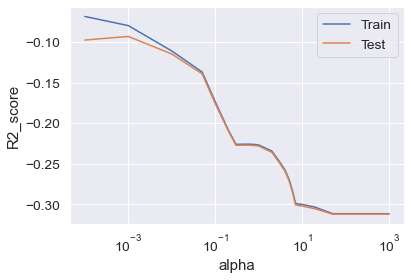

In [2535]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()


In [2536]:
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)

0.9043659398332141
0.8660720488236165


In [2537]:
linear_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearRemo

In [2581]:
top5 = ['GrLivArea', 'Neighborhood_Crawfor','GarageCars', 'BsmtUnfSF','YearRemodAdd']

In [2582]:
## drop them from train and test data
X_train_dropped = X_train.drop(top5, axis=1)
X_test_dropped = X_test.drop(top5, axis=1)

In [2583]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2584]:
GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2585]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [2586]:
lasso = Lasso(alpha=0.001)

In [2587]:
# Fit the model on training data
lasso.fit(X_train_dropped, y_train)


Lasso(alpha=0.001)

In [2588]:
## Make predictions
y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)

In [2589]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.87
RSS (Train) = 16.35
RSS (Test) = 8.65
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.14


In [2590]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.900040
R2 Score (Test),0.874879
RSS (Train),16.345937
RSS (Test),8.653410
MSE (Train),0.016010
MSE (Test),0.019757
RMSE (Train),0.126530
RMSE (Test),0.140558


In [2593]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')


,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.918571,0.900040
R2 Score (Test),0.875701,0.874879
RSS (Train),13.315680,16.345937
RSS (Test),8.596599,8.653410
MSE (Train),0.013042,0.016010
MSE (Test),0.019627,0.019757
RMSE (Train),0.114201,0.126530
RMSE (Test),0.140096,0.140558


In [2614]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.401),
 ('LotFrontage', -0.004),
 ('LotArea', 0.013),
 ('YearRemodAdd', 0.001),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', 0.008),
 ('BsmtFinSF2', 0.015),
 ('BsmtUnfSF', 0.097),
 ('TotalBsmtSF', 0.101),
 ('1stFlrSF', 0.003),
 ('2ndFlrSF', 0.025),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.042),
 ('BsmtFullBath', 0.019),
 ('BsmtHalfBath', -0.0),
 ('FullBath', -0.025),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.023),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.041),
 ('Fireplaces', 0.009),
 ('GarageYrBlt', 0.005),
 ('GarageCars', 0.013),
 ('GarageArea', 0.004),
 ('WoodDeckSF', 0.016),
 ('OpenPorchSF', -0.018),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', -0.002),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', 0.019),
 ('HouseAge', -0.0),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.0),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.0),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER

In [2615]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [2616]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,12.401
1,LotFrontage,-0.004
2,LotArea,0.013
3,YearRemodAdd,0.001
4,MasVnrArea,-0.000


In [2617]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,12.401
109,HouseStyle_2Story,0.193
8,TotalBsmtSF,0.101
7,BsmtUnfSF,0.097
118,OverallQual_Very Excellent,0.088
...,...,...
68,Neighborhood_ClearCr,-0.078
66,Neighborhood_BrDale,-0.078
117,OverallQual_Poor,-0.088
110,HouseStyle_Others,-0.114


In [2618]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.401
109,HouseStyle_2Story,0.193
8,TotalBsmtSF,0.101
7,BsmtUnfSF,0.097
118,OverallQual_Very Excellent,0.088
...,...,...
68,Neighborhood_ClearCr,-0.078
66,Neighborhood_BrDale,-0.078
117,OverallQual_Poor,-0.088
110,HouseStyle_Others,-0.114


In [2619]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 9.461),
 ('LotFrontage', -0.009),
 ('LotArea', 0.019),
 ('YearRemodAdd', 0.002),
 ('MasVnrArea', 0.007),
 ('BsmtFinSF1', 0.003),
 ('BsmtFinSF2', 0.014),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.008),
 ('1stFlrSF', 0.036),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.066),
 ('BsmtFullBath', 0.023),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.035),
 ('HalfBath', 0.02),
 ('BedroomAbvGr', 0.004),
 ('KitchenAbvGr', -0.023),
 ('TotRmsAbvGrd', 0.012),
 ('Fireplaces', 0.016),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.068),
 ('GarageArea', 0.004),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.014),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.014),
 ('PoolArea', -0.015),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('HouseAge', -0.002),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.025),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.003),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.022),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 194

In [2620]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9286915739338651
0.8769878592227804


In [2621]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13936880937207893


In [2622]:
 #Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [2623]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,9.461
114,OverallQual_Excellent,0.115
70,Neighborhood_Crawfor,0.083
86,Neighborhood_StoneBr,0.073
190,Functional_Typ,0.069
22,GarageCars,0.068
80,Neighborhood_NridgHt,0.067
12,GrLivArea,0.066
123,OverallCond_Excellent,0.062
119,OverallQual_Very Good,0.062


In [2624]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,9.461
114,OverallQual_Excellent,0.115
70,Neighborhood_Crawfor,0.083
86,Neighborhood_StoneBr,0.073
190,Functional_Typ,0.069
...,...,...
71,Neighborhood_Edwards,-0.071
122,OverallCond_Below Average,-0.072
74,Neighborhood_MeadowV,-0.077
115,OverallQual_Fair,-0.112


In [2625]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,9.461
114,OverallQual_Excellent,0.115
70,Neighborhood_Crawfor,0.083
86,Neighborhood_StoneBr,0.073
190,Functional_Typ,0.069
...,...,...
71,Neighborhood_Edwards,-0.071
122,OverallCond_Below Average,-0.072
74,Neighborhood_MeadowV,-0.077
115,OverallQual_Fair,-0.112


In [2639]:
dataFramefinal = pd.DataFrame(paraRFE)
dataFramefinal.head(15)

,Variable,Coeff
0,constant,9.461
114,OverallQual_Excellent,0.115
70,Neighborhood_Crawfor,0.083
86,Neighborhood_StoneBr,0.073
190,Functional_Typ,0.069
22,GarageCars,0.068
80,Neighborhood_NridgHt,0.067
12,GrLivArea,0.066
123,OverallCond_Excellent,0.062
119,OverallQual_Very Good,0.062
